Question 1(a)

In [2]:
from PIL import Image
import numpy as np
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read and display image

[ WARN:0@3.526] global loadsave.cpp:248 findDecoder imread_('/home/vaibhav/Documents/103070.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

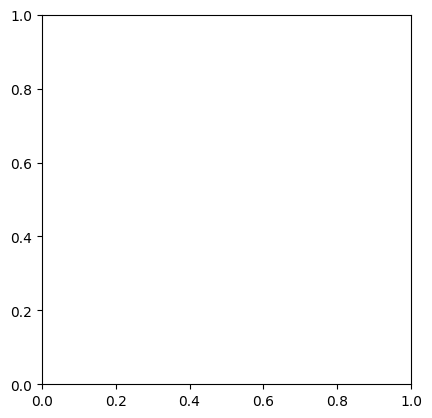

In [3]:
#Using opencv
#Give image path
imagepath1 = '/home/vaibhav/Documents/103070.jpg'
imagecv = cv2.imread(imagepath1) #Importing Image
#Display image
plt.imshow(imagecv)
plt.show()

#The image is displayed below

In [ ]:
#Saving the image as a png file
directory='/home/vaibhav/Documents'
os.chdir(directory)
print(os.listdir(directory))
cv2.imwrite('img1.png',imagecv)

['103070.jpg', 'hw2', 'HW1']


True

In [ ]:
print(imagecv.size)
print(imagecv.shape)

463203
(321, 481, 3)


The Dimensions of the Image is (321,481,3)
The size of File is 463203 (=321*481*3)

Question 1 (b)

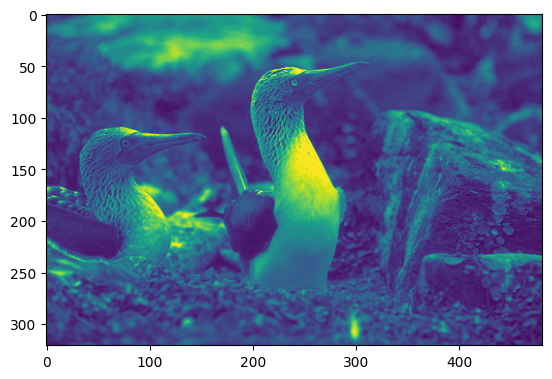

In [ ]:
b,g,r=cv2.split(imagecv)
#plt.imshow(r)
img2=cv2.merge([b])
plt.imshow(img2)
plt.show()

Answer 1(b). The image shows the particular colour more whichever intensity we leave intact. 

Variation in Range for Blue channel= 226
Variation in Range for Green channel= 226
Variation in Range for Red channel= 232


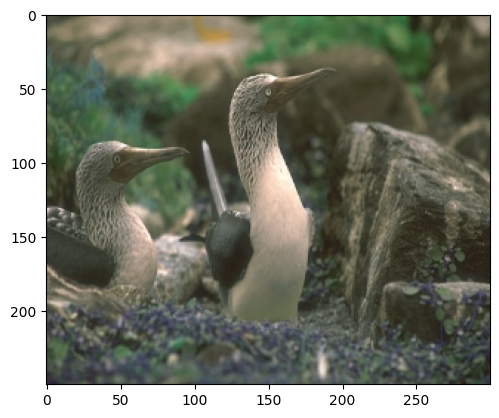

In [ ]:
img3=cv2.resize(imagecv,(300,250))
#print(img3)
b,g,r=cv2.split(img3)
p1=np.array(b)
print("Variation in Range for Blue channel=",np.max(p1)-np.min(p1))
p2=np.array(g)
print("Variation in Range for Green channel=",np.max(p2)-np.min(p2))
p3=np.array(r)
print("Variation in Range for Red channel=",np.max(p3)-np.min(p3))
plt.imshow(img3)

Question 1(c)
Answer= Variation in Range for Blue channel= 226
Variation in Range for Green channel= 226
Variation in Range for Red channel= 232
The  variation in intensities is almost same for all the colors and is very high , this shows that image conatins pixels of very wide range , from dark to bright.

Question 1(e)

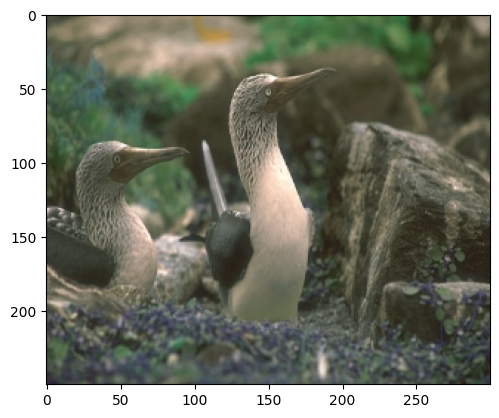

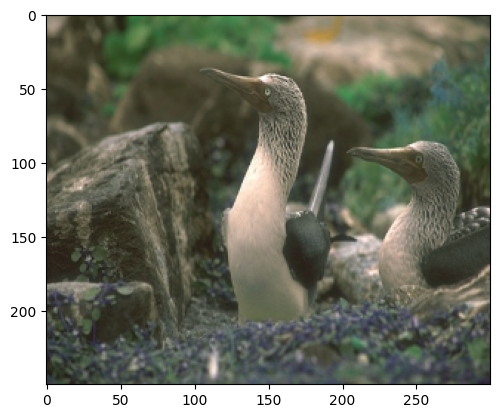

In [ ]:
img4=cv2.flip(img3,1)
plt.imshow(img3)
plt.show()
plt.imshow(img4)
plt.show()

Question 1(d)


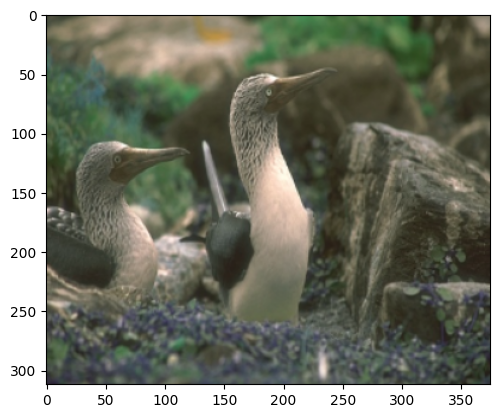

In original image Pixel 1=[64 65 49] and Pixel 2=[47 43 32]
In Scaled image Pixel 1=[64 65 49] and Pixel 2=[46 45 29]


In [ ]:
img5=cv2.resize(img3,None,fx=1.25,fy=1.25,interpolation=cv2.INTER_LINEAR)
plt.imshow(img5)
plt.show()
pixel1=img3[0,0]
pixel2=img3[100,100]
scaled_pixel1=img5[0,0]
scaled_pixel2=img5[124,124]
print(f"In original image Pixel 1={pixel1} and Pixel 2={pixel2}")
print(f"In Scaled image Pixel 1={scaled_pixel1} and Pixel 2={scaled_pixel2}")

Answer1(d)= There is slight variation in value of pixel 2 due to bilinear interpolation.

Question 2(a)

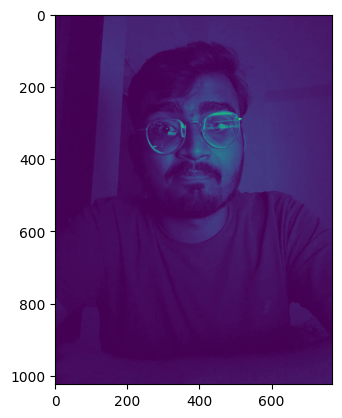

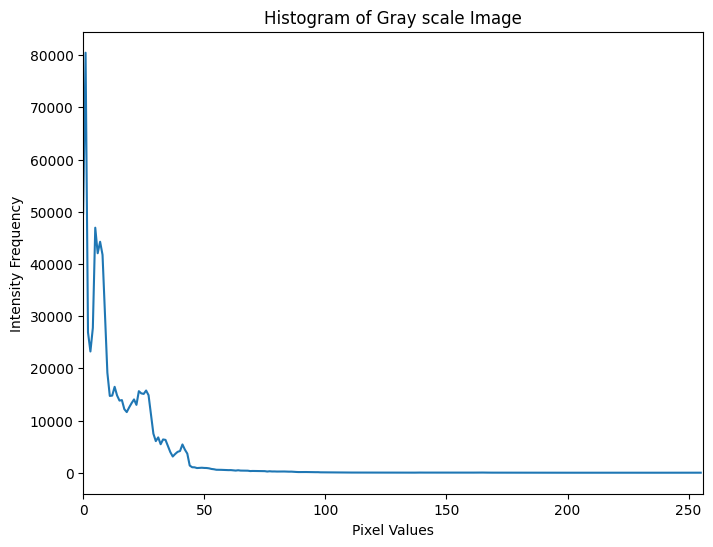

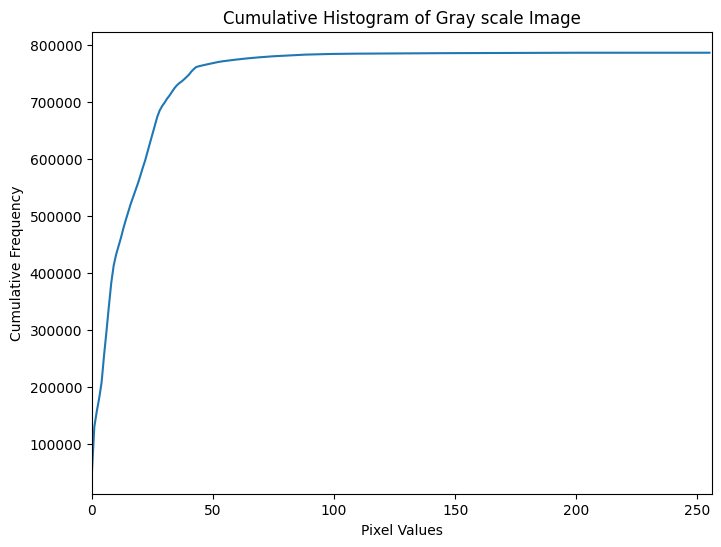

In [ ]:
imgpth="//home/vaibhav/Documents/me.jpeg"
myimg=cv2.imread(imgpth)
myimg1=cv2.cvtColor(myimg,cv2.COLOR_BGR2GRAY)
#myimg1=cv2.resize(myimg1,(300,400))
plt.imshow(myimg1)
plt.show()
hist=cv2.calcHist([myimg1],[0],None,[256],[0,256],)
plt.figure(figsize=(8,6))
plt.title('Histogram of Gray scale Image')
plt.xlabel('Pixel Values')
plt.ylabel('Intensity Frequency')
plt.plot(hist)
plt.xlim([0,256])
plt.show()

cumulativehist=hist.cumsum()
plt.figure(figsize=(8,6))
plt.title('Cumulative Histogram of Gray scale Image')
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Frequency')
plt.plot(cumulativehist)
plt.xlim([0,256])
plt.show()


Question 2(b)
Answer= Th good value of a=1.8

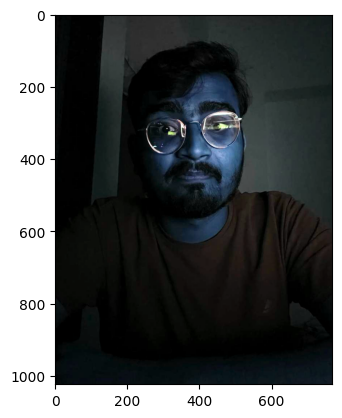

In [ ]:
a=1.8
brightimg=(myimg*a).clip(0,255).astype(np.uint8)
plt.imshow(brightimg)
plt.show()

Question 2(c)
Answer= 

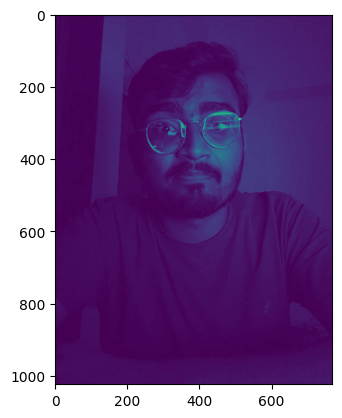

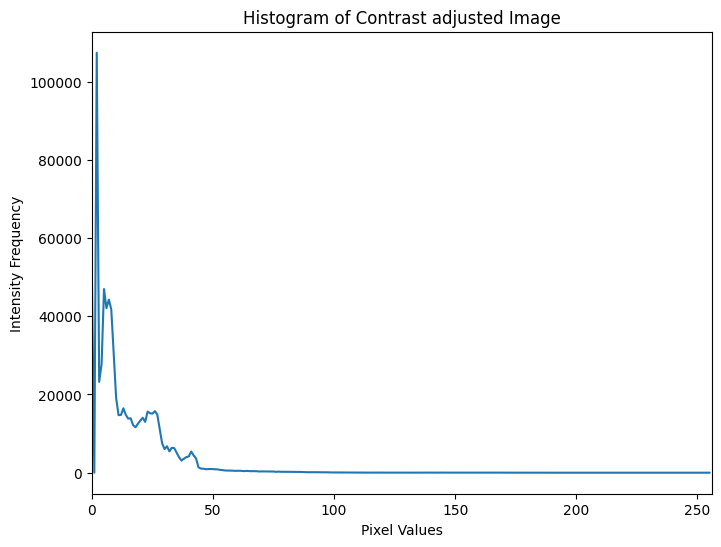

In [ ]:
min_intensity=np.min(myimg1)
max_intensity=np.max(myimg1)
myimg3= np.clip(((myimg1 - min_intensity) * 255 / (max_intensity - min_intensity))+myimg1, 0, 255).astype(np.uint8)
plt.imshow(myimg3)
plt.show()

hist=cv2.calcHist([myimg3],[0],None,[256],[0,256],)
plt.figure(figsize=(8,6))
plt.title('Histogram of Contrast adjusted Image')
plt.xlabel('Pixel Values')
plt.ylabel('Intensity Frequency')
plt.plot(hist)
plt.xlim([0,256])
plt.show()

Answer 2(c)
Yes applying contrast adjustment helps by enhancing the visbility in the areas of low visiblity.

Question 2(d)

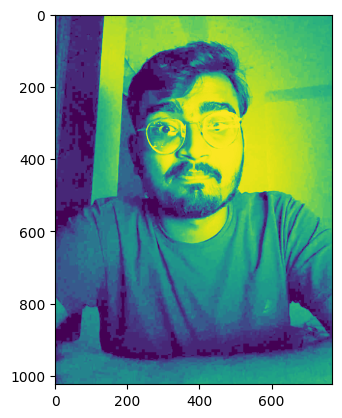

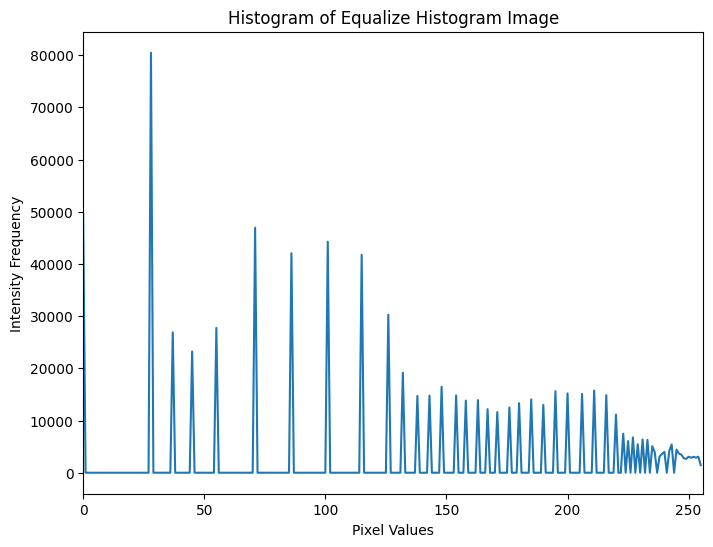

In [ ]:
myimg2=cv2.equalizeHist(myimg1)
plt.imshow(myimg2)
plt.show()

hist=cv2.calcHist([myimg2],[0],None,[256],[0,256],)
plt.figure(figsize=(8,6))
plt.title('Histogram of Equalize Histogram Image')
plt.xlabel('Pixel Values')
plt.ylabel('Intensity Frequency')
plt.plot(hist)
plt.xlim([0,256])
plt.show()

Answer 2(d) . The histogram is not flat because the original image has non-uniform distribution of pixel values , that is why it is not  perfectly flat.
Comparing the histogram equalized image and the contrast-adjusted image from the previous part:
The contrast-adjusted image from the previous part have been adjusted , and it have a relatively flat histogram.


Question 2(e)

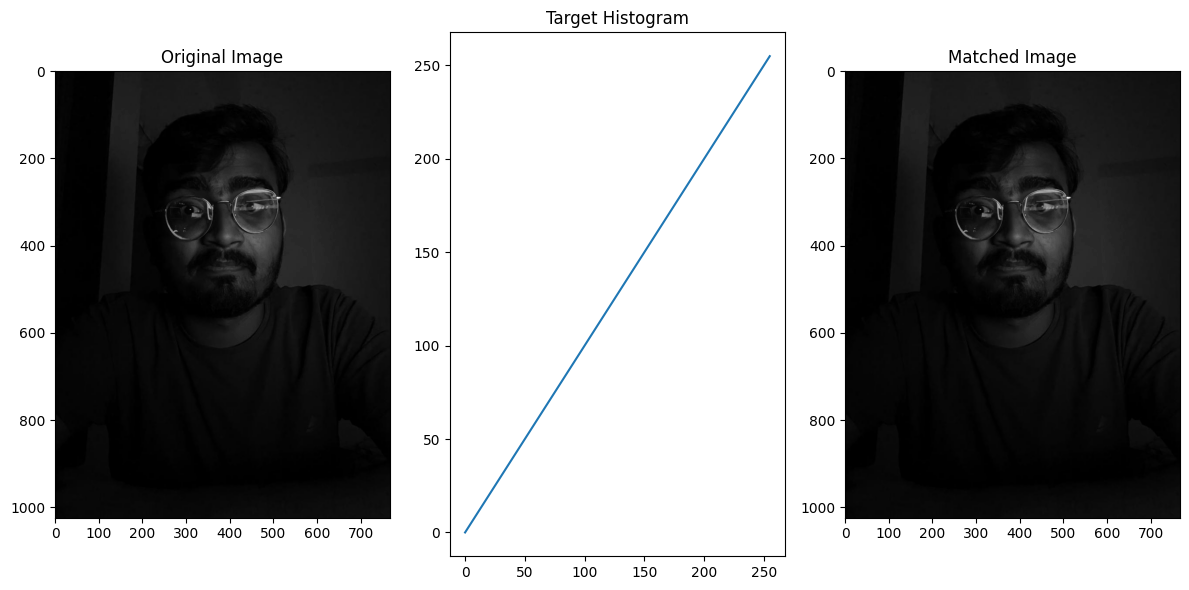

In [ ]:
target_histogram = np.arange(256, dtype=np.uint8)
matched_image = cv2.LUT(myimg1, target_histogram)
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(myimg1, cmap='gray')

plt.subplot(132)
plt.title('Target Histogram')
plt.plot(target_histogram)

plt.subplot(133)
plt.title('Matched Image')
plt.imshow(matched_image, cmap='gray')

plt.tight_layout()
plt.show()